In [1]:
import spacepy.pycdf as pycdf
import numpy as np
import pandas as pd

# load the cdf file
cdf_file = pycdf.CDF('c:/Users/harsh/Downloads/SWIS Dataset/AL1_ASW91_L1_AUX_20241020_UNP_9999_999999_V01.cdf')

In [2]:
cdf_file

<CDF:
DC_temp_mon: CDF_UINT2 [172787, 3]
ESA1_HV: CDF_UINT2 [172787, 5]
ESA1_HV_set: CDF_UINT2 [172787, 5]
ESA2_HV_mon: CDF_UINT2 [172787, 5]
ESA2_HV_set: CDF_UINT2 [172787, 5]
FEE_cal_chn: CDF_UINT2 [172787]
FEE_cal_mode: CDF_UINT2 [172787]
FEE_volt_mon: CDF_UINT2 [172787, 4]
Focus: CDF_UINT2 [172787, 5]
Focus_set: CDF_UINT2 [172787, 5]
HV_PCB_temp_mon: CDF_UINT2 [172787, 5]
HV_pack_mon: CDF_UINT2 [172787, 2]
HW_LLD: CDF_UINT2 [172787, 5]
MCP1_HV: CDF_UINT2 [172787, 5]
MCP1_HV_set: CDF_UINT2 [172787]
MCP1_PHD_mode: CDF_UINT2 [172787]
MCP1_curr_mon: CDF_UINT2 [172787, 5]
MCP1_curr_override: CDF_UINT2 [172787]
MCP1_curr_trip: CDF_UINT2 [172787]
MCP1_spike_override: CDF_UINT2 [172787]
MCP1_spike_trip: CDF_UINT2 [172787]
MCP1_start_comm: CDF_UINT2 [172787]
MCP1_status: CDF_UINT2 [172787]
MCP1_trip_check: CDF_UINT2 [172787]
MCP2_HV_mon: CDF_UINT2 [172787, 5]
MCP2_HV_set: CDF_UINT2 [172787]
MCP2_PHD_mode: CDF_UINT2 [172787]
MCP2_curr_mon: CDF_UINT2 [172787, 5]
MCP2_curr_override: CDF_UINT2 

In [52]:
# using fits file
from astropy.io import fits
fits_file = fits.open('SUT_T25_0253_000776_Lev1.0_2025-02-24T23.31.40.997_0972NB03.fits')

In [53]:
fits_file.info()

Filename: SUT_T25_0253_000776_Lev1.0_2025-02-24T23.31.40.997_0972NB03.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     244   (2048, 2048)   int16 (rescales to float32)   


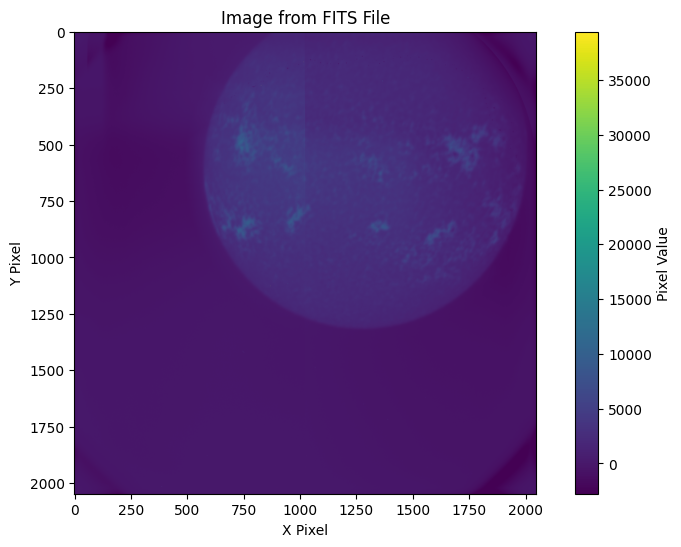

In [54]:
import  matplotlib.pyplot as plt
# Plotting the data from the FITS file
plt.figure(figsize=(10, 6))
plt.imshow(fits_file[0].data)
plt.colorbar(label='Pixel Value')
plt.title('Image from FITS File')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

In [55]:
data_pd = pd.DataFrame({
    'epoch_for_cdf': cdf_file['epoch_for_cdf'][:, 0],
    'Time': cdf_file['epoch_for_cdf'][:, 0],
    'obs_time': cdf_file['obs_time'][:, 0],
    'DC_temp': cdf_file['DC_temp_mon'][:, 0],
    'energy_mode_01': cdf_file['THA1_single_energy_mode'][:],
    'energy_mode_02': cdf_file['THA2_single_energy_mode'][:],
    'x_pos': cdf_file['spacecraft_xpos'][:],
    'y_pos': cdf_file['spacecraft_ypos'][:],
    'z_pos': cdf_file['spacecraft_zpos'][:],
    'x_vel': cdf_file['spacecraft_xvel'][:],
    'y_vel': cdf_file['spacecraft_yvel'][:],
    'z_vel': cdf_file['spacecraft_zvel'][:],
    'angle_xgse': cdf_file['angle_xgse'],
    'angle_ygse': cdf_file['angle_ygse'],
    'angle_zgse': cdf_file['angle_zgse'],
    'trig_counts': cdf_file['trig_counts'],
    'coin_trig_counts': cdf_file['coin_trig_counts'],
    'rej_counts': cdf_file['rej_counts'],
    'peak_det_counts': cdf_file['peak_det_counts'],
    'pile_up_time': cdf_file['pile_up_time'],
    'HW_LLD': cdf_file['HW_LLD'],
    'SW_LLD': cdf_file['SW_LLD'],
    'SW_ULD': cdf_file['SW_ULD']
})


KeyboardInterrupt: 

In [56]:
time = data_pd['epoch_for_cdf']


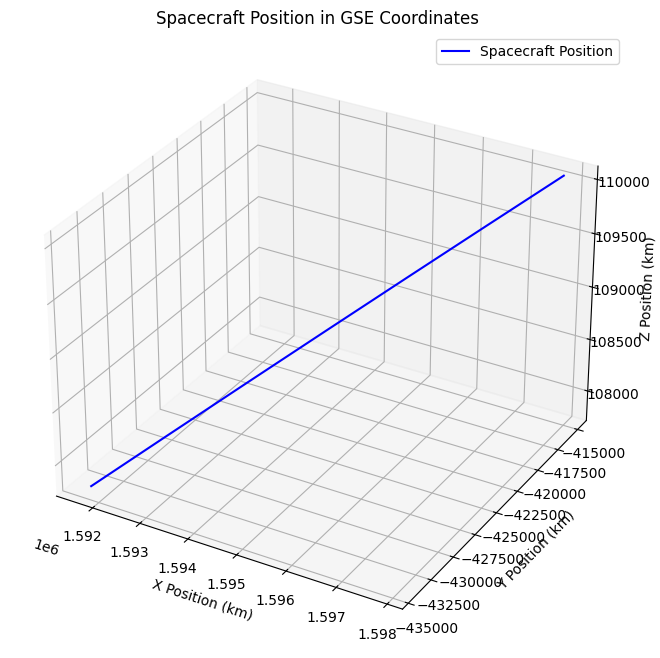

In [57]:
time
x_pos = data_pd['x_pos']
y_pos = data_pd['y_pos']
z_pos = data_pd['z_pos']
x_vel = data_pd['x_vel']
y_vel = data_pd['y_vel']
z_vel = data_pd['z_vel']
# Plotting the spacecraft position in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_pos, y_pos, z_pos, label='Spacecraft Position', color='b')
ax.set_xlabel('X Position (km)')
ax.set_ylabel('Y Position (km)')
ax.set_zlabel('Z Position (km)')    
ax.set_title('Spacecraft Position in GSE Coordinates')
ax.legend()
plt.show()

In [58]:
# FINDING LATITUDE AND LONGITUDE
from spacepy import coordinates as coord
from spacepy.time import Ticktock

# Prepare the coordinates and time
gse_coords = np.vstack([x_pos.values, y_pos.values, z_pos.values]).T
# Convert pandas datetime64 to ISO format strings for Ticktock
ticks = Ticktock(time.dt.strftime('%Y-%m-%dT%H:%M:%S.%f').tolist(), 'UTC')

# Create Coords object in GSE (Cartesian representation)
coords = coord.Coords(gse_coords, 'GSE', 'car')
coords.ticks = ticks

# Convert to GEO (geodetic) coordinates
coords_geo = coords.convert('GEO', 'car')
coords_geo_geodetic = coords_geo.convert('GEO', 'sph')

# Extract latitude and longitude
latitude = coords_geo_geodetic.data[:, 1]  # latitude in degrees
longitude = coords_geo_geodetic.data[:, 2]  # longitude in degrees
latitude, longitude

(array([-1.43897803, -1.43897686, -1.43897568, ..., -1.62750208,
        -1.62750098, -1.62749987], shape=(172787,)),
 array([164.0463317 , 164.04632779, 164.04632389, ..., 163.43066648,
        163.43066267, 163.43065886], shape=(172787,)))

In [59]:
# convert latitude and longitude to radians
latitude_rad = np.radians(latitude)
longitude_rad = np.radians(longitude)
latitude_rad, longitude_rad
data_pd['latitude'] = latitude
data_pd['longitude'] = longitude

In [60]:
# angular value for the spacecraft position
angular_value = np.arctan2(np.sin(longitude_rad), np.cos(longitude_rad))  # in radians
angular_value_deg = np.degrees(angular_value)  # convert to degrees
angular_value_deg
data_pd['angular_value'] = angular_value_deg

In this code, observer refers to an object (likely a SunPy Map or a related WCS-aware object) that contains metadata and methods describing the viewpoint from which the solar image was taken. This typically includes the position of the spacecraft or observatory (e.g., SOHO, STEREO) in space, as well as information about the image's orientation, pixel scale, and reference coordinates.

Key points:

observer.observer_coordinate gives the longitude, latitude, and radius (distance from the Sun) of the observer (i.e., the spacecraft or telescope).
observer.reference_pixel gives the pixel coordinates in the image that correspond to the reference point (often the Sun's center).
observer.pixel_to_world() converts pixel coordinates to world (solar) coordinates, using the observer's position.
Summary:
Yes, in this context, observer represents the position and orientation of the spacecraft or observatory that captured the solar image.

In [61]:
# observer
x_pos = data_pd['x_pos']
y_pos = data_pd['y_pos']
z_pos = data_pd['z_pos']
x_vel = data_pd['x_vel']
y_vel = data_pd['y_vel']
z_vel = data_pd['z_vel']

In [86]:
import sunpy.map
from astropy.io import fits

# Open the FITS file and patch the header if needed
with fits.open("VS1_T25_0895_002304_20250613_175941_LG_lev2_V2_1.fits") as hdul:
	hdr = hdul[0].header
	# Patch the unit string if present
	for key in hdr:
		if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
			hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')
	# Force CUNIT1 to 'arcsec' to satisfy SunPy Map requirements
	hdr['CUNIT1'] = 'arcsec'
	# Create the SunPy map from the patched HDU
	observer = sunpy.map.Map(hdul[0].data, hdr)

c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sunpy\map\mapbase.py:1272: SunpyMetadataWarning: Missing CTYPE1 from metadata, assuming CTYPE1 is HPLN-TAN
  warn_metadata("Missing CTYPE1 from metadata, assuming CTYPE1 is HPLN-TAN")
c:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sunpy\map\mapbase.py:1277: SunpyMetadataWarning: Missing CTYPE2 from metadata, assuming CTYPE2 is HPLT-TAN
  warn_metadata("Missing CTYPE2 from metadata, assuming CTYPE2 is HPLT-TAN")


In [ ]:
import sunpy.map
from astropy.io import fits

# Open the FITS file and patch the header if needed
with fits.open("SUT_T25_0253_000776_Lev1.0_2025-02-24T23.31.40.997_0972NB03.fits") as hdul:
	hdr = hdul[0].header
	# Patch the unit string if present
	for key in hdr:
		if isinstance(hdr[key], str) and 'milli-angstrom' in hdr[key]:
			hdr[key] = hdr[key].replace('milli-angstrom', 'angstrom')
	# Force CUNIT1 to 'arcsec' to satisfy SunPy Map requirements
	hdr['CUNIT1'] = 'arcsec'
	# Create the SunPy map from the patched HDU
	observer = sunpy.map.Map(hdul[0].data, hdr)

<SkyCoord (HeliographicStonyhurst: obstime=2025-02-24T23:31:40.997, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.22248158, -7.1139313, 1.46553685e+11)>
<SkyCoord (Helioprojective: obstime=2025-02-24T23:31:40.997, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2025-02-24T23:31:40.997, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.22248158, -7.1139313, 1.46553685e+11)>): (Tx, Ty) in arcsec
    (0., 0.)>


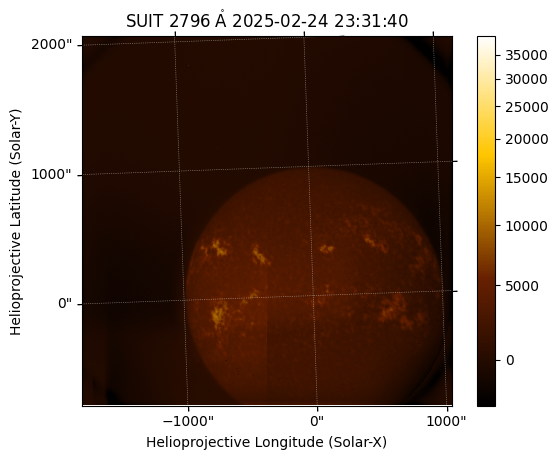

In [94]:
print(observer.observer_coordinate)
print(observer.reference_coordinate)
observer.peek()  # Shows the image

In [80]:
data_pd.columns

Index(['epoch_for_cdf', 'Time', 'obs_time', 'DC_temp', 'energy_mode_01',
       'energy_mode_02', 'x_pos', 'y_pos', 'z_pos', 'x_vel', 'y_vel', 'z_vel',
       'angle_xgse', 'angle_ygse', 'angle_zgse', 'trig_counts',
       'coin_trig_counts', 'rej_counts', 'peak_det_counts', 'pile_up_time',
       'HW_LLD', 'SW_LLD', 'SW_ULD', 'latitude', 'longitude', 'angular_value'],
      dtype='object')

In [81]:
# angular_width
import numpy as np

# Example using directional vectors
x, y, z = data_pd['angle_xgse'], data_pd['angle_ygse'], data_pd['angle_zgse']
r = np.sqrt(x**2 + y**2 + z**2)
theta = np.arccos(z / r)  # polar angle
phi = np.arctan2(y, x)    # azimuthal angle

# Estimate angular spread
angular_width = np.degrees(np.percentile(phi, 95) - np.percentile(phi, 5))

In [83]:
pi = 22/7

In [ ]:
# finding radial 
radial_km = pixel_distance * arcsec_per_pixel * (pi / 648000) * dsun_obs
radial_solRad = radial_km / 695700  # Convert km to solar radii

Observatory,Aditya-L1
Instrument,SUIT
Detector,SUIT
Measurement,2796.0 Angstrom
Wavelength,2796.0 Angstrom
Observation Date,2025-02-24 23:31:40
Exposure Time,0.3 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[1.396 1.396] arcsec / pix
Reference Pixel,[1279.6 608.6] pix

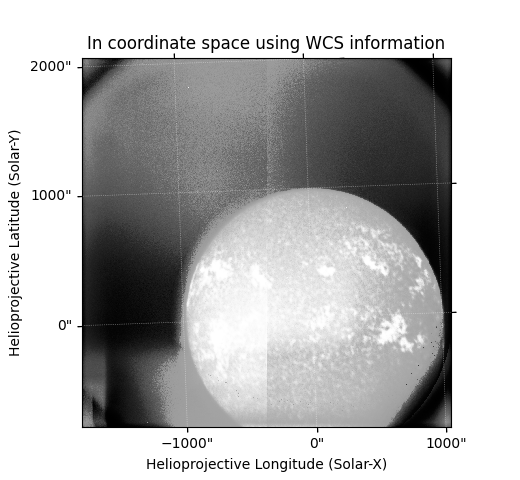
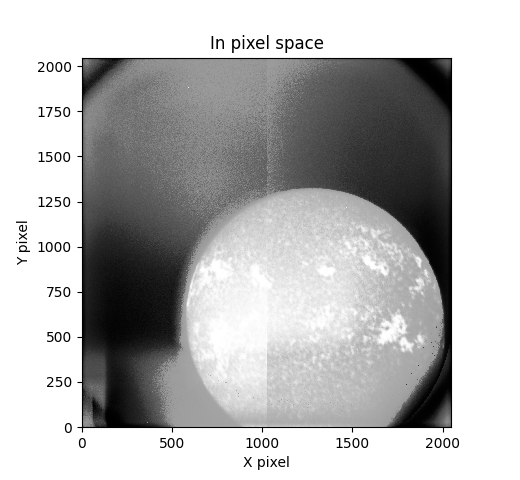
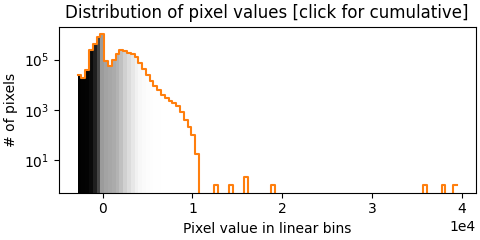
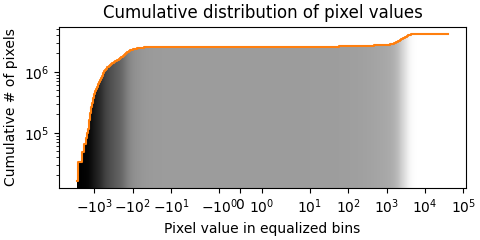

In [95]:
observer

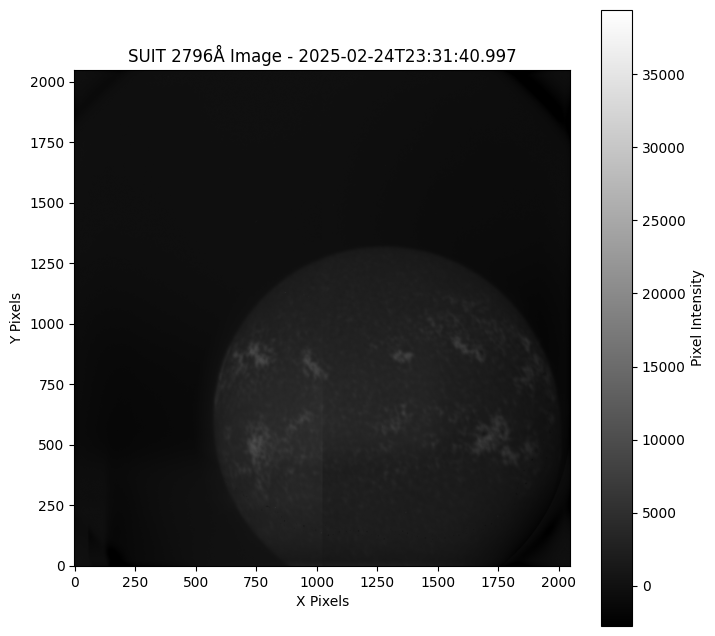

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(observer.data, cmap='gray', origin='lower')  # or cmap='inferno', 'plasma'
plt.colorbar(label='Pixel Intensity')
plt.title(f'SUIT 2796Å Image - {observer.date}')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()


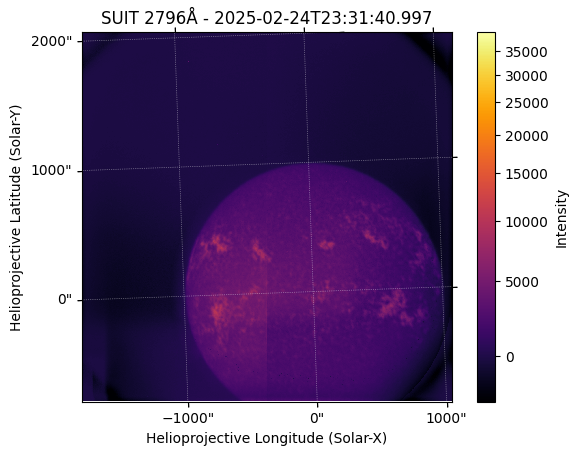

In [124]:
observer.plot(cmap='inferno')
plt.colorbar(label='Intensity')
plt.title(f"SUIT 2796Å - {observer.date}")
plt.show()


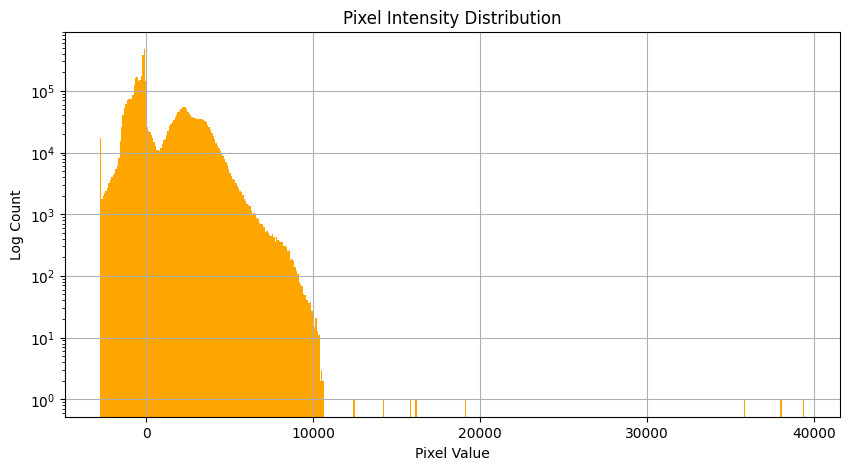

In [125]:
plt.figure(figsize=(10, 5))
plt.hist(observer.data.ravel(), bins=500, color='orange', log=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Log Count")
plt.grid(True)
plt.show()


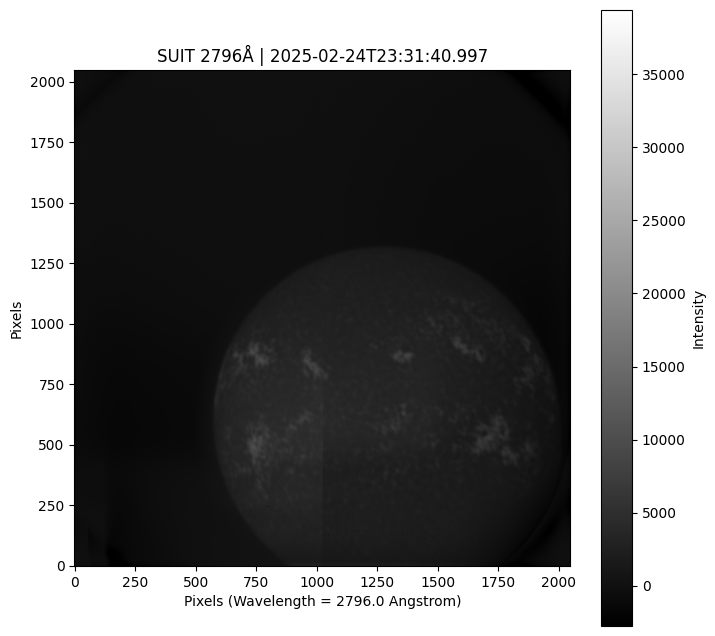

In [126]:
plt.figure(figsize=(8, 8))
plt.imshow(observer.data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title(f"SUIT 2796Å | {observer.date}")
plt.xlabel(f'Pixels (Wavelength = {observer.wavelength})')
plt.ylabel('Pixels')
plt.show()


In [122]:
print(observer.reference_pixel)

PixelPair(x=<Quantity 1279.6 pix>, y=<Quantity 608.6 pix>)


In [1]:
# Returns the shape of the image as (ny, nx)
observer.exposer_time


NameError: name 'observer' is not defined

In [96]:
observer.data.shape

(2048, 2048)

In [97]:
# 2D numpy array of pixel values (intensities)
image_data = observer.data

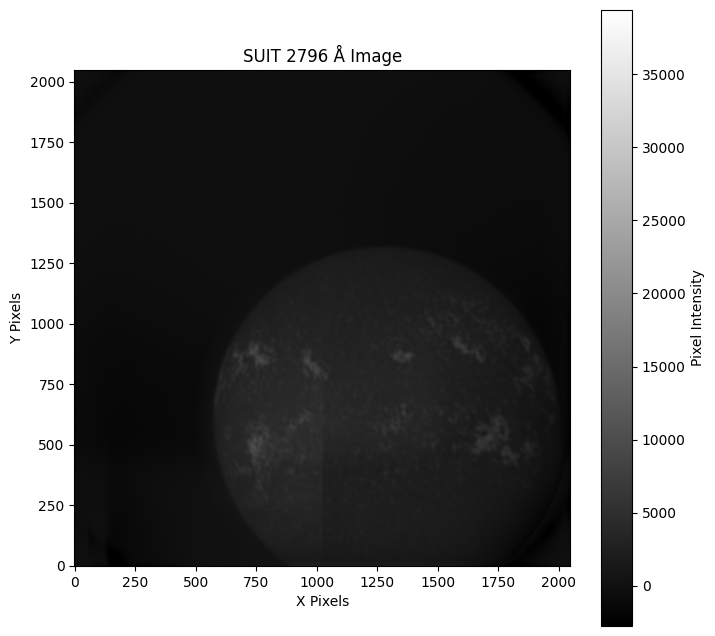

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Intensity')
plt.title('SUIT 2796 Å Image')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()


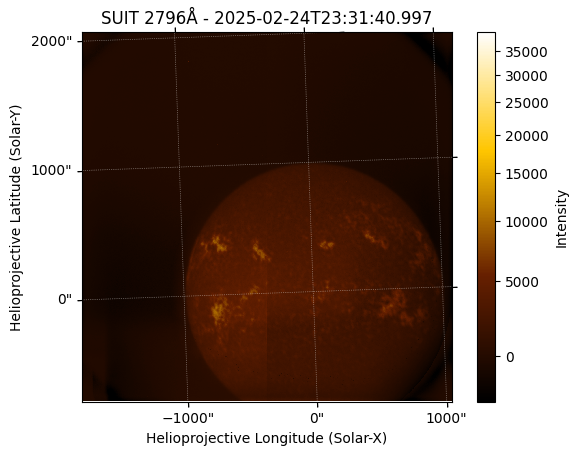

In [99]:
# Plot with SunPy’s coordinate-aware plotting
observer.plot()
plt.colorbar(label='Intensity')
plt.title(f'SUIT 2796Å - {observer.date}')
plt.show()


In [100]:
observer.meta['wavelnth']      # wavelength in Angstrom
observer.exposure_time         # Exposure time in seconds
observer.scale                 # arcsec/pixel in x and y
observer.reference_pixel       # Reference pixel (CRPIX)
observer.reference_coordinate  # Center of the Sun (CRVAL)
observer.observer_coordinate   # Position of spacecraft (if included)

<SkyCoord (HeliographicStonyhurst: obstime=2025-02-24T23:31:40.997, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.22248158, -7.1139313, 1.46553685e+11)>

In [101]:
observer.reference_coordinate

<SkyCoord (Helioprojective: obstime=2025-02-24T23:31:40.997, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2025-02-24T23:31:40.997, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.22248158, -7.1139313, 1.46553685e+11)>): (Tx, Ty) in arcsec
    (0., 0.)>

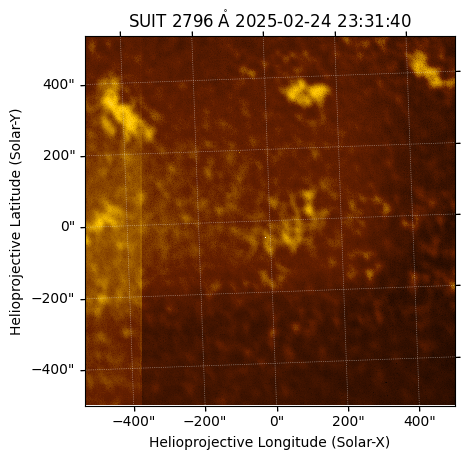

In [112]:
from sunpy.map import Map

import astropy.units as u
from astropy.coordinates import SkyCoord

# Define bottom left and top right corners as SkyCoord in arcsec
bottom_left = SkyCoord(-500 * u.arcsec, -500 * u.arcsec, frame=observer.coordinate_frame)
top_right = SkyCoord(500 * u.arcsec, 500 * u.arcsec, frame=observer.coordinate_frame)

submap = observer.submap(bottom_left=bottom_left, top_right=top_right)

submap.plot()
plt.show()

In [113]:
# Save the full image to PNG
plt.imsave("suit_image.png", observer.data, cmap='gray')

# Or save intensity data to CSV
import pandas as pd
pd.DataFrame(observer.data).to_csv("suit_intensity.csv", index=False)


In [71]:
distance = 1.5e6
sun_distance = 1.461e8

In [ ]:
distance - sun_distance

-144600000.0

In [ ]:
# finding radial


In [76]:
from ccmc_swpc_cat_web.swpc_utils import return_plot, return_image

# Use the first row as an example; change the index as needed
idx = 0

sample = return_plot(
    observer,
    0,
    # radial
    15.0,
    data_pd['angular_value'].iloc[idx],
    # longitude
    data_pd['longitude'].iloc[idx],
    data_pd['latitude'].iloc[idx]
)

c:\Users\harsh\Downloads\ISRO\ccmc_swpc_cat_web\swpc_utils.py:311: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return np.array(pd.read_json(calc_plot_json(observer, sat_id, radial, angular, long, lat,)))


In [127]:
print(observer.meta)

('simple': 'True')
('bitpix': '-32')
('naxis': '2')
('naxis1': '2048')
('naxis2': '2048')
('grt_dt': '2025-02-25T10:53:37.788')
('dhobt_dt': '2025-02-24T23:31:40.997050000')
('frm_cnt': '8209')
('dhobtcnt': '185921852738')
('sdram': '4084072448')
('packet': '4188285873')
('imgtrid': '62317')
('fw1pos': '1')
('x1': '10')
('fw2pos': '0')
('y1': '0')
('rofreq': '280')
('bin_en': 'enable')
('ccd_dump': '1')
('roi_ff': 'Full Frame')
('shtr_op': '84694979')
('img_tran': '84696179')
('cmd_expt': '300')
('img_type': 'Normal')
('obs_mode': '151')
('roi_id': '17')
('solx1tr': '0')
('solx2tr': '0')
('heliostr': '1')
('flr_trig': '84243105')
('rej_bit': '0')
('shtr_str': '1.494140625')
('ccd_rdom': '4 output mode(EFGH)')
('shtr_sto': '181.142578125')
('roi_m_en': '1')
('shtr_hte': '0')
('exp_nir': '0')
('exp_nd8': '0')
('roi_nd16': '0')
('roi_chkm': '0')
('norm_flr': '0')
('prom_flr': '0')
('er_fl_e': '0')
('er_fl_f': '0')
('er_fl_g': '0')
('er_fl_h': '0')
('er_fl_dl': '0')
('shtr_trq': '1/8 Micro

In [128]:
import numpy as np

# Flatten pixel values and calculate threshold
pixel_values = observer.data.flatten()
mean_val = np.mean(pixel_values)
std_val = np.std(pixel_values)

# Set threshold: Mean + k*StdDev (e.g., k=3)
threshold = mean_val + 3 * std_val

print("Threshold for CME brightening (SUIT image):", threshold)


Threshold for CME brightening (SUIT image): 5863.796


In [129]:
bright_pixels = observer.data > threshold

In [130]:
bright_pixels

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(2048, 2048))

In [131]:
from scipy.stats import zscore

# Convert to total counts per timestep (simplified)
total_counts = data_pd['trig_counts'].apply(lambda x: np.sum(x))  # flatten nested vector

# Z-score based thresholding
z_scores = zscore(total_counts)
threshold_indices = np.where(z_scores > 3)[0]  # anomalies with z > 3

print("CME candidate indices:", threshold_indices)
print("Threshold count value:", total_counts.iloc[threshold_indices[0]])

CME candidate indices: [     0      9     20 ... 168321 168328 171088]
Threshold count value: 33858


In [133]:
from astropy import units as u
from astropy.time import Time

# Example: Convert arcsec to km (assuming small-angle approx)
arcsec_to_km = lambda arcsec: (arcsec * u.arcsec).to(u.rad).value * (1 * u.AU).to(u.km).value

D1_km = arcsec_to_km(500)  # CME height in image 1
D2_km = arcsec_to_km(800)  # CME height in image 2

T1 = Time('2025-02-24T23:31:40')
T2 = Time('2025-02-24T23:34:40')  # assume next image at +3 min

delta_t = (T2 - T1).to('s').value  # seconds
cme_speed = (D2_km - D1_km) / delta_t

print("Estimated CME speed:", round(cme_speed, 2), "km/s")

Estimated CME speed: 1208.78 km/s


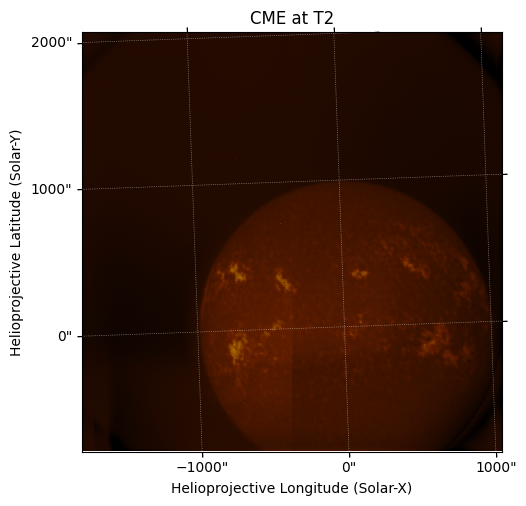

In [137]:
import matplotlib.pyplot as plt
import sunpy.map
from astropy.io import fits

with fits.open("SUT_T25_0253_000776_Lev1.0_2025-02-24T23.31.40.997_0972NB03.fits") as hdul2:
	hdr2 = hdul2[0].header
	for key in hdr2:
		if isinstance(hdr2[key], str) and 'milli-angstrom' in hdr2[key]:
			hdr2[key] = hdr2[key].replace('milli-angstrom', 'angstrom')
	hdr2['CUNIT1'] = 'arcsec'
	observer2 = sunpy.map.Map(hdul2[0].data, hdr2)

fig = plt.figure(figsize=(10, 5))

# Second subplot with correct projection
ax2 = fig.add_subplot(1, 2, 2, projection=observer2.wcs)
observer2.plot(axes=ax2)
ax2.set_title("CME at T2")

plt.tight_layout()
plt.show()


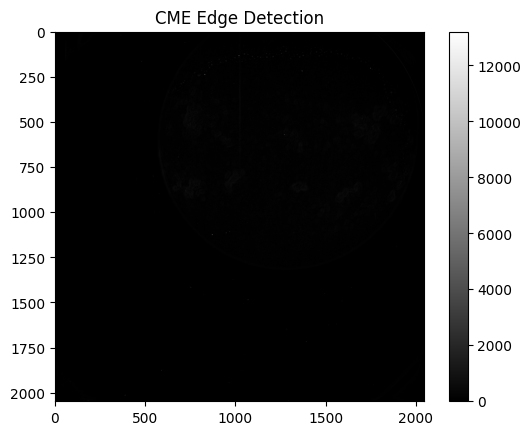

In [141]:
from skimage import filters

edges = filters.sobel(observer.data)
plt.imshow(edges, cmap='gray')
plt.title("CME Edge Detection")
plt.colorbar()
plt.show()


In [142]:
distance_to_earth_km = 1.496e8  # 1 AU in km
arrival_time_hr = distance_to_earth_km / 1208.78 / 3600  # hours

print(f"Estimated CME Earth arrival time: {arrival_time_hr:.2f} hrs (~{arrival_time_hr/24:.2f} days)")


Estimated CME Earth arrival time: 34.38 hrs (~1.43 days)
